In [51]:
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.transforms import ScaledTranslation
import pyplotbrookings.pyplotbrookings as ppb
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline

In [ ]:
def bv_decomp(f, model, n=10, sigma=0.3, n_avg=1000):

  # Fixed test set
  test_X = np.linspace(0, 1, 100)

  # Storage for model predictions on test set
  predictions = np.zeros((n_avg, len(test_X)))

  for i in range(n_avg):
      # Generate training data
      train_X = np.linspace(0, 1, n)
      train_Y = f(train_X) + np.random.normal(0, sigma, size=n)

      # Fit polynomial on training data
      fit_model = model.fit(train_X[:, np.newaxis], train_Y)

      # Predict on fixed test set
      predictions[i] = fit_model.predict(test_X[:, np.newaxis])

  # Compute expected prediction
  expected_f = np.mean(predictions, axis=0)

  # Compute bias squared
  bias_squared = np.mean((f(test_X) - expected_f) ** 2)

  # Compute variance
  variance = np.mean(np.var(predictions, axis=0))

  return bias_squared, variance

In [ ]:
def polynomial_regression(m):
  return Pipeline([('poly', PolynomialFeatures(degree=m)),
                  ('linear', LinearRegression(fit_intercept=False))])

def polynomial_ridge(m):
  return Pipeline([('poly', PolynomialFeatures(degree=m)),
                  ('linear', RidgeCV(alphas=np.exp(np.arange(-26, -8, 2)), fit_intercept=False))])

def f(x):
    return np.sin(2 * np.pi * x)

In [ ]:
data = list(zip(*[bv_decomp(f, polynomial_regression(m)) for m in range(10)]))
reg_bias = np.array(data[0])
reg_variance = np.array(data[1])

In [ ]:
data = list(zip(*[bv_decomp(f, polynomial_ridge(m)) for m in range(10)]))
ridge_bias = np.array(data[0])
ridge_variance = np.array(data[1])

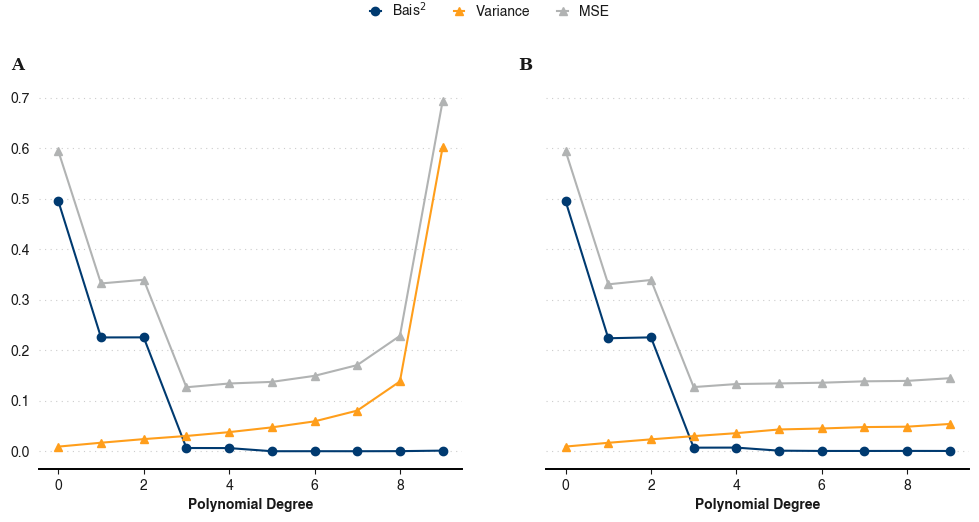

In [56]:
# Set theme for all plots
ppb.set_theme()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)


ax2.plot(ridge_bias, linestyle='-', marker='o', color='C0', label='Bais$^2$')
ax1.plot(reg_bias, linestyle='-', marker='o', color='C0')

ax2.plot(ridge_variance, linestyle='-', marker='^', color='C1', label='Variance')
ax1.plot(reg_variance, linestyle='-', marker='^', color='C1')

ax2.plot(ridge_variance + ridge_bias + 0.09, linestyle='-', marker='^', color='C5', label='MSE')
ax1.plot(reg_variance +reg_bias + 0.09, linestyle='-', marker='^', color='C5')

ax1.set_xlabel('Polynomial Degree')
ax2.set_xlabel('Polynomial Degree')

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncols=3, borderpad=1)

# Add
for label, ax in zip(['A', 'B'], (ax1, ax2)):
    ax.text(
        0.0, 1.0, label, transform=(
            ax.transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='medium', weight='bold', va='bottom', fontfamily='serif')

    plt.savefig('figure1.png', dpi=300)